**IMPORTANDO BIBLIOTECAS**


In [ ]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
import pandas as pd
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error


**CARREGANDO OS DADOS**

In [ ]:
#https://drive.google.com/drive/search?q=owner%3Ame%20(type%3Aapplication%2Fvnd.google.colaboratory%20%7C%7C%20type%3Aapplication%2Fvnd.google.colab)&authuser=0
PATH_DADOS = '/content/drive/MyDrive/calculo-porosidade/dataset/labels-porosidade.csv'
PATH_TRAIN = '/content/drive/MyDrive/calculo-porosidade/dataset/df_train.csv'
PATH_TEST = '/content/drive/MyDrive/calculo-porosidade/dataset/df_test.csv'



In [ ]:
train_df = pd.read_csv(PATH_TRAIN)
test_df = pd.read_csv(PATH_TEST)

**DEFININDO GERADORES**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.2
)



In [ ]:
train_generator = datagen.flow_from_dataframe(
    dataframe=train_df,
    directory='/content/drive/MyDrive/calculo-porosidade/dataset/images',
    x_col='id',
    y_col='porosidade',
    target_size=(120,120),
    batch_size=32,
    class_mode='raw',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_dataframe(
    dataframe=train_df,
    directory='/content/drive/MyDrive/calculo-porosidade/dataset/images',
    x_col='id',
    y_col='porosidade',
    target_size=(120, 120),
    batch_size=32,
    class_mode='raw',
    subset='validation',
    shuffle=True
)


test_generator = datagen.flow_from_dataframe(
    dataframe=test_df,
    directory='/content/drive/MyDrive/calculo-porosidade/dataset/images',
    x_col='id',
    y_col='porosidade',
    target_size=(120, 120),
    batch_size=32,
    class_mode='raw',
    shuffle=False
)

Found 59 validated image filenames.
Found 14 validated image filenames.
Found 16 validated image filenames.


**CRIANDO O MODELO**

In [ ]:
'''inputs = tf.keras.Input(shape=(120, 120, 3))
x = tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu')(inputs)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(x)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='linear')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
'''

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    MaxPool2D,
    Flatten,
    Dropout,
    BatchNormalization,
)

model = Sequential()
model.add(Conv2D(75, (3, 3), strides=1, padding="same", activation="relu",
                 input_shape=(120, 120, 3)))
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(50, (3, 3), strides=1, padding="same", activation="relu"))
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(25, (3, 3), strides=1, padding="same", activation="relu"))
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Flatten())
model.add(Dense(units=512, activation="relu"))
model.add(Dense(units=1, activation="linear"))




model.compile(
    optimizer='adam',
    loss='mse'
)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
           restore_best_weights=True
        )
    ]
)

Epoch 1/100
2/2 [==============================] - 21s 17s/step - loss: 797849.3750 - val_loss: 49231.9258
Epoch 2/100
2/2 [==============================] - 3s 2s/step - loss: 22218.4277 - val_loss: 1461.0437
Epoch 3/100
2/2 [==============================] - 3s 2s/step - loss: 935.4877 - val_loss: 45.0297
Epoch 4/100
2/2 [==============================] - 5s 3s/step - loss: 614.9565 - val_loss: 299.2534
Epoch 5/100
2/2 [==============================] - 5s 3s/step - loss: 200.8476 - val_loss: 191.7886
Epoch 6/100
2/2 [==============================] - 3s 2s/step - loss: 133.3253 - val_loss: 260.6954
Epoch 7/100
2/2 [==============================] - 4s 2s/step - loss: 124.1209 - val_loss: 87.1359
Epoch 8/100
2/2 [==============================] - 5s 2s/step - loss: 38.3070 - val_loss: 31.6731
Epoch 9/100
2/2 [==============================] - 3s 1s/step - loss: 31.1885 - val_loss: 36.9210
Epoch 10/100
2/2 [==============================] - 3s 1s/step - loss: 27.4401 - val_loss: 68.28

In [ ]:
predicted_porosity = np.squeeze(model.predict(test_generator))
true_porosity = test_generator.labels

1/1 [==============================] - 1s 531ms/step


In [ ]:
true_porosity

array([19.1, 15.8, 18.1, 16.2, 22.5,  7.2,  6.6,  7.4,  5.5, 16.7,  5.9,
       15.8, 11.7, 24.2, 10.1,  9.8])

In [ ]:
predicted_porosity

array([19.657679, 16.21668 , 16.422165, 17.924307, 15.943784, 12.71006 ,
       12.447359, 12.811479, 13.180436, 17.346634, 12.521701, 14.678405,
       12.664164, 17.2924  , 12.283477, 12.961039], dtype=float32)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
rmse = np.sqrt(model.evaluate(test_generator, verbose=0))
print("     Test RMSE: {:.5f}".format(rmse))

r2 = r2_score(true_porosity, predicted_porosity)
print("Test R^2 Score: {:.5f}".format(r2))


print("MAE: ",mean_absolute_error(true_porosity, predicted_porosity))

     Test RMSE: 4.42347
Test R^2 Score: 0.43469
MAE:  3.5617662429809576


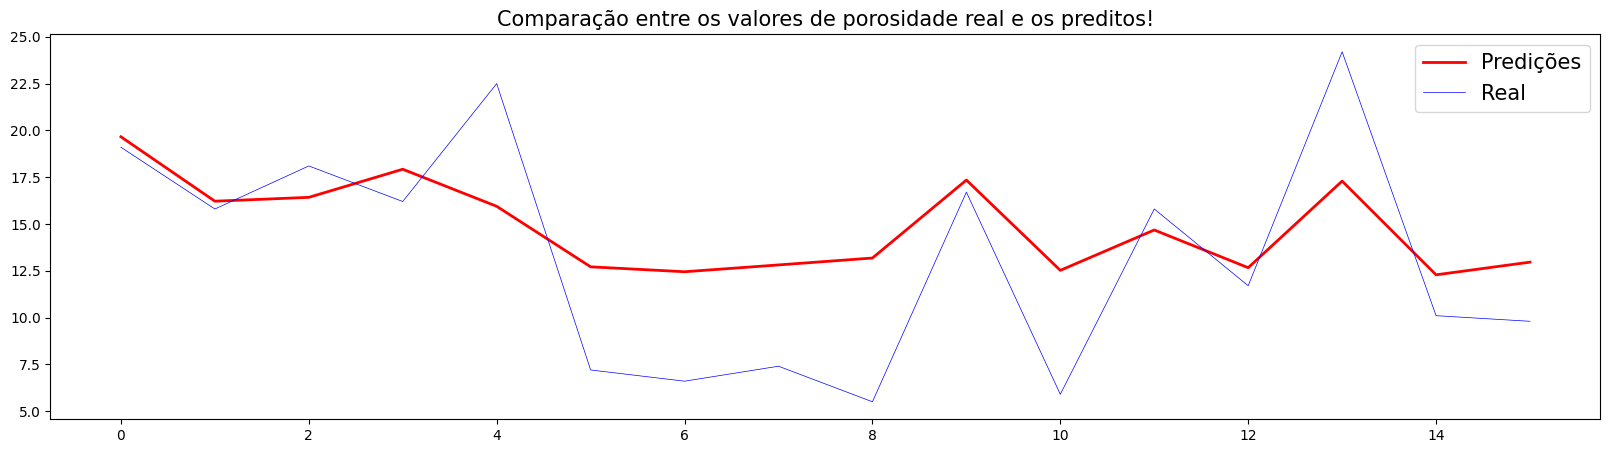

In [ ]:
%matplotlib inline
plt.figure(figsize=(20,5))
plt.plot(predicted_porosity[:150], linewidth=2, color='r')
plt.plot(true_porosity[:150], linewidth=0.5,color='b')
plt.title('Comparação entre os valores de porosidade real e os preditos!',size=15)
plt.legend(['Predições','Real'],fontsize=15)
plt.show()

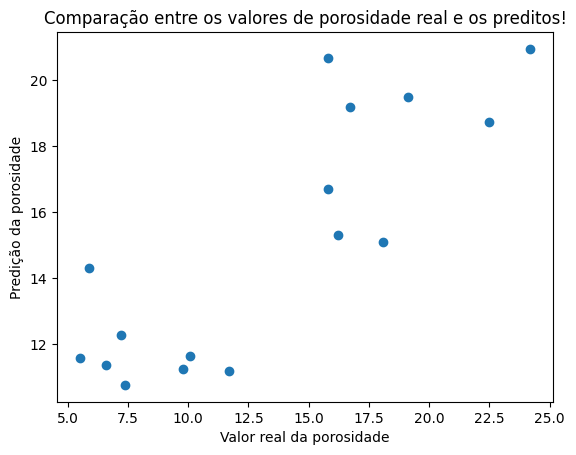

In [ ]:
plt.scatter(true_porosity, predicted_porosity)
plt.xlabel('Valor real da porosidade')
plt.ylabel('Predição da porosidade')
plt.title('Comparação entre os valores de porosidade real e os preditos!')
plt.show()

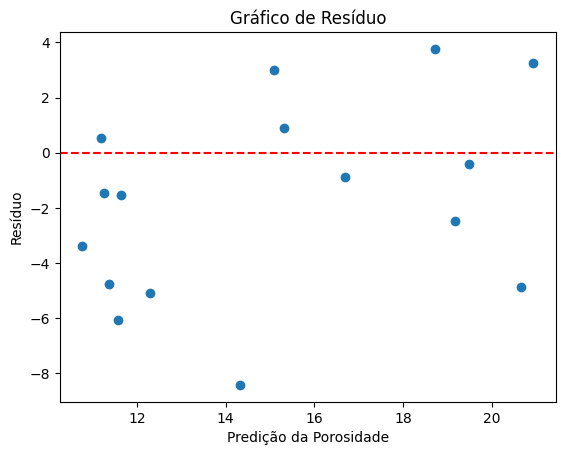

In [ ]:
residuals = true_porosity - predicted_porosity
plt.scatter(predicted_porosity, residuals)
plt.xlabel('Predição da Porosidade')
plt.ylabel('Resíduo')
plt.title('Gráfico de Resíduo')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [ ]:
model.save("/content/drive/MyDrive/calculo-porosidade/dataset/modelo-porosidade.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from keras.models import load_model


model = load_model('/content/drive/MyDrive/calculo-porosidade/dataset/modelo-porosidade.h5')

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image as image_utils

def show_image(image_path):
    image = mpimg.imread(image_path)
    plt.imshow(image, cmap='gray')

def load(image_path):

    image = image_utils.load_img(image_path, color_mode="rgb", target_size=(120, 120))

    return image

In [ ]:
def predict_image(file_path, model):
    show_image(file_path)
    image = load(file_path)
    image = image_utils.img_to_array(image)
    #plt.imshow(image, cmap='gray')
    image = image.reshape(1, 120, 120, 3)
    prediction = model.predict(image)


    return prediction

1/1 [==============================] - 0s 55ms/step


array([[6.156811]], dtype=float32)

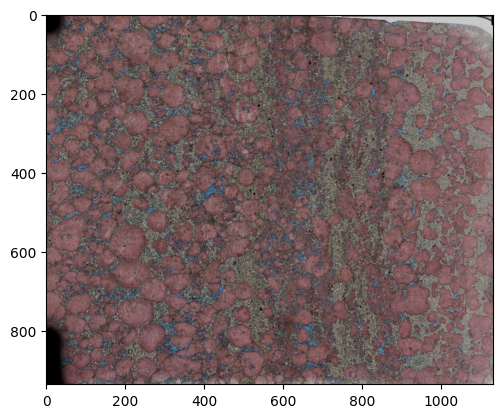

In [ ]:
predict_image( '/content/3-RJS-0706-RJ_5588.60_x10_PP.jpg', model)